<a href="https://colab.research.google.com/github/aurorali17/STA365/blob/main/Hw4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Part one**

      mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
nu  44.504  32.54   4.547  101.799      0.437    0.333    5802.0    4340.0   

    r_hat  
nu    1.0  


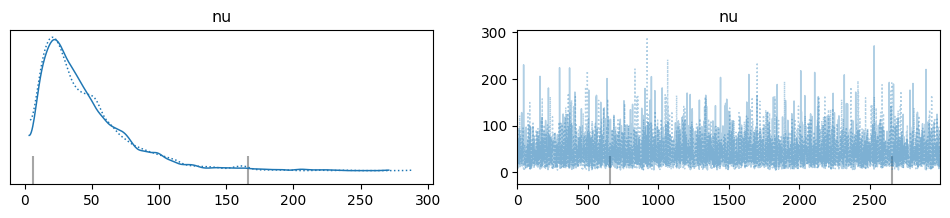

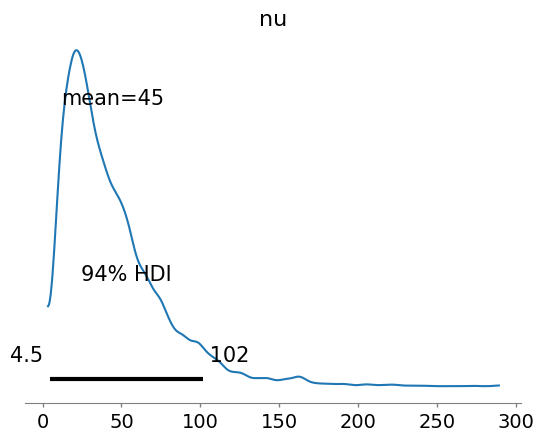

In [2]:
import pymc as pm
import arviz as az
import numpy as np


np.random.seed(1005)
observed_data = np.random.normal(loc=5, scale=2, size=100)

with pm.Model() as model:
    mu = pm.Normal('mu', mu=0, sigma=10)
    sigma = pm.HalfNormal('sigma', sigma=10)
    nu = pm.Exponential('nu', lam=1/30)
    y = pm.StudentT('y', mu=mu, sigma=sigma, nu=nu, observed=observed_data)
    trace = pm.sample(draws=3000, tune=1000, return_inferencedata=True)
with model:
    az.plot_trace(trace, var_names=['nu'])
    az.plot_posterior(trace, var_names=['nu'])
    summary = az.summary(trace, var_names=['nu'])

print(summary)



**Return to your posterior analysis in "Homework #4 Part I" and report on (a) effective sample sizes; (b) chain convergence measures; (c) divergences; (d) Metropolis-Hastings acceptance rates [see below for how to access these]; and (e) any other warnings or concers provided by PyMC**

In [3]:
ess = az.ess(trace)
print(ess)


<xarray.Dataset>
Dimensions:  ()
Data variables:
    mu       float64 7.13e+03
    sigma    float64 6.25e+03
    nu       float64 5.802e+03


In [4]:
r_hat = az.rhat(trace)
print(r_hat)


<xarray.Dataset>
Dimensions:  ()
Data variables:
    mu       float64 1.0
    sigma    float64 1.0
    nu       float64 1.0


In [5]:
divergences = trace.sample_stats.diverging.sum().item()
print(f"Divergences: {divergences}")


Divergences: 2


In [8]:
warnings = az.summary(trace, var_names=['nu'], round_to=2)
print("\nWarnings or Concerns:\n", warnings)



Warnings or Concerns:
     mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
nu  44.5  32.54    4.55    101.8       0.44     0.33   5802.14   4339.93   

    r_hat  
nu    1.0  


In [10]:
acceptance_rate_trace = trace.sample_stats.acceptance_rate.values.flatten()

print("\nMetropolis-Hastings Acceptance Rate (trace):", acceptance_rate_trace)



Metropolis-Hastings Acceptance Rate (trace): [0.82004767 0.87372254 0.84814815 ... 1.         0.46722017 0.36414374]


 **Provide an analogous report regarding (a)-(e) above for the "centered" and "uncentered" Eight Schools models
Hint: for (d) see fit_C.sample_stats.acceptance_rate.values.flatten() and fit_NC.sample_stats.acceptance_rate.values.flatten() and in the Eight Schools example**

In [12]:
import numpy as np
import pymc as pm
import arviz as az
import logging

# Data for the Eight Schools example
J = 8
y = np.array([28.0, 8.0, -3.0, 7.0, -1.0, 1.0, 18.0, 12.0])
sigma = np.array([15.0, 10.0, 16.0, 11.0, 9.0, 11.0, 10.0, 18.0])

# Centered Model
with pm.Model() as Centered_eight:
    mu = pm.Normal("mu", mu=0, sigma=5)
    tau = pm.HalfCauchy("tau", beta=5)
    theta = pm.Normal("theta", mu=mu, sigma=tau, shape=J)
    obs = pm.Normal("obs", mu=theta, sigma=sigma, observed=y)

    SEED = [20100420, 20134234]
    fit_C = pm.sample(5000, chains=2, tune=1000, random_seed=SEED, return_inferencedata=True)

# Non-Centered Model
with pm.Model() as NonCentered_eight:
    mu = pm.Normal("mu", mu=0, sigma=5)
    tau = pm.HalfCauchy("tau", beta=5)
    theta_tilde = pm.Normal("theta_t", mu=0, sigma=1, shape=J)
    theta = pm.Deterministic("theta", mu + tau * theta_tilde)
    obs = pm.Normal("obs", mu=theta, sigma=sigma, observed=y)

    fit_NC = pm.sample(5000, chains=2, tune=1000, random_seed=SEED, return_inferencedata=True)

# Logging setup (optional)
_log = logging.getLogger("pymc")
_log.setLevel(logging.INFO)

# Posterior analysis for Centered Model
print("Centered Model Analysis:")
ess_C = az.ess(fit_C)
r_hat_C = az.rhat(fit_C)
divergences_C = fit_C.sample_stats.diverging.sum().item()
acceptance_rate_C = fit_C.sample_stats.acceptance_rate.values.flatten()
warnings_C = az.summary(fit_C, round_to=2)

print("Effective Sample Sizes:\n", ess_C)
print("\nR-hat:\n", r_hat_C)
print(f"\nDivergences: {divergences_C}")
print("\nAcceptance Rates:\n", acceptance_rate_C)
print("\nWarnings or Concerns:\n", warnings_C)

print("\nNon-Centered Model Analysis:")
ess_NC = az.ess(fit_NC)
r_hat_NC = az.rhat(fit_NC)
divergences_NC = fit_NC.sample_stats.diverging.sum().item()
acceptance_rate_NC = fit_NC.sample_stats.acceptance_rate.values.flatten()
warnings_NC = az.summary(fit_NC, round_to=2)

print("Effective Sample Sizes:\n", ess_NC)
print("\nR-hat:\n", r_hat_NC)
print(f"\nDivergences: {divergences_NC}")
print("\nAcceptance Rates:\n", acceptance_rate_NC)
print("\nWarnings or Concerns:\n", warnings_NC)


INFO:pymc.sampling.mcmc:Auto-assigning NUTS sampler...
INFO:pymc.sampling.mcmc:Initializing NUTS using jitter+adapt_diag...
INFO:pymc.sampling.mcmc:Sequential sampling (2 chains in 1 job)
INFO:pymc.sampling.mcmc:NUTS: [mu, tau, theta]


INFO:pymc.sampling.mcmc:Sampling 2 chains for 1_000 tune and 5_000 draw iterations (2_000 + 10_000 draws total) took 36 seconds.
INFO:pymc.stats.convergence:We recommend running at least 4 chains for robust computation of convergence diagnostics
INFO:pymc.sampling.mcmc:Auto-assigning NUTS sampler...
INFO:pymc.sampling.mcmc:Initializing NUTS using jitter+adapt_diag...
INFO:pymc.sampling.mcmc:Sequential sampling (2 chains in 1 job)
INFO:pymc.sampling.mcmc:NUTS: [mu, tau, theta_t]


INFO:pymc.sampling.mcmc:Sampling 2 chains for 1_000 tune and 5_000 draw iterations (2_000 + 10_000 draws total) took 23 seconds.
INFO:pymc.stats.convergence:We recommend running at least 4 chains for robust computation of convergence diagnostics


Centered Model Analysis:
Effective Sample Sizes:
 <xarray.Dataset>
Dimensions:      (theta_dim_0: 8)
Coordinates:
  * theta_dim_0  (theta_dim_0) int64 0 1 2 3 4 5 6 7
Data variables:
    mu           float64 622.8
    theta        (theta_dim_0) float64 538.5 978.4 1.575e+03 ... 415.2 1.248e+03
    tau          float64 128.7

R-hat:
 <xarray.Dataset>
Dimensions:      (theta_dim_0: 8)
Coordinates:
  * theta_dim_0  (theta_dim_0) int64 0 1 2 3 4 5 6 7
Data variables:
    mu           float64 1.006
    theta        (theta_dim_0) float64 1.006 1.004 1.003 ... 1.003 1.006 1.002
    tau          float64 1.023

Divergences: 354

Acceptance Rates:
 [7.57529151e-01 9.72231513e-01 9.54940855e-01 ... 5.70538494e-04
 6.60861775e-02 3.10133553e-06]

Warnings or Concerns:
           mean    sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
mu        4.30  3.39   -1.98    10.55       0.14     0.10    622.77    372.14   
theta[0]  6.60  6.25   -3.97    19.07       0.22     0.16    538.46   

**From the perspective of curvature of the energy function (that is, how rapidly the log joint posterior distribution density changes for different values of its random variable (parameters) and the effectiveness of the HMC algorithm, explain why the "uncentered" paramterization of the model performs better than the "centered" parameterization**
Answer: log posterior distribution are more regular and looks like a normal distrubution. And it can reduce divergences.

**Use the code on the next slide to provide and interpret the diagnostic plot assessing energy proposals versus the empirical energy distribution to compare and contrast the "centered" and "uncentered" Eight Schools models in relation to you previous comparision of these two model parameterization in terms of energy function curvature and the effectiveness of the HMC algorithm... does this diagnostic support your previous conclusions in these regards?**

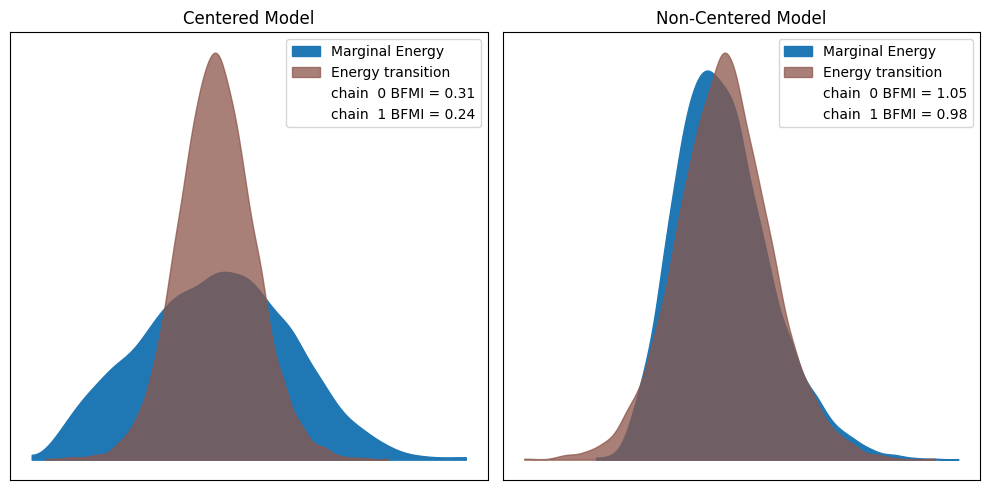

In [15]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Energy Plot for Centered Model
az.plot_energy(fit_C, ax=axs[0])
axs[0].set_title('Centered Model')

# Energy Plot for Non-Centered Model
az.plot_energy(fit_NC, ax=axs[1])
axs[1].set_title('Non-Centered Model')

plt.tight_layout()
plt.show()

Yes, this diagnostic support my previous conclusions. Comparing to centered model, non-centered model have better overlap between the marginal and transition energy distributions. And it is symmetric and tails of distrubution are very small.